<a href="https://colab.research.google.com/github/swastikbanerjee/CV_Lab/blob/main/cv_lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import cv2
import numpy as np
from scipy.ndimage import median_filter, maximum_filter, minimum_filter
from google.colab.patches import cv2_imshow
from scipy.ndimage import generic_filter

In [76]:
image = cv2.imread('pic.jpeg', cv2.IMREAD_GRAYSCALE)

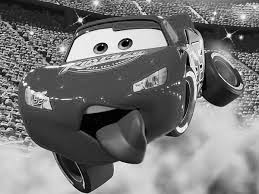

In [77]:
cv2_imshow(image)

Median Filter (Built in)

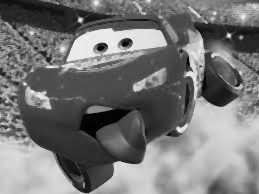

In [78]:
median_filter_built_in = cv2.medianBlur(image, 3)
cv2_imshow(median_filter_built_in)

Median Filter (Custom)

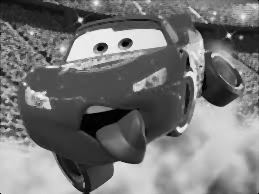

In [79]:
def median_filter_custom(image, kernel_size):
    result = np.zeros_like(image)
    padded_image = np.pad(image, ((kernel_size // 2, ), (kernel_size // 2, )), mode='constant')
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            neighbors = padded_image[i:i+kernel_size, j:j+kernel_size].flatten()
            result[i, j] = np.median(neighbors)
    return result
median_filtered_image_custom = median_filter_custom(image, kernel_size=3)
cv2_imshow(median_filtered_image_custom)

Max Filter (Built In)

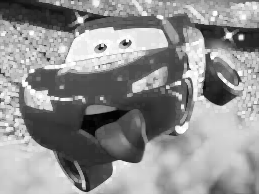

In [80]:
max_filter_built_in = maximum_filter(image, size=3)
cv2_imshow(max_filter_built_in)

Max Filter (Custom)

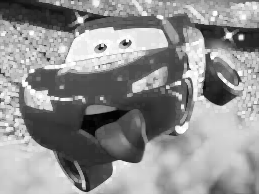

In [81]:
def max_filter_custom(image, kernel_size):
    result = np.zeros_like(image)
    padded_image = np.pad(image, ((kernel_size // 2, ), (kernel_size // 2, )), mode='constant')
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            neighbors = padded_image[i:i+kernel_size, j:j+kernel_size].flatten()
            result[i, j] = np.max(neighbors)
    return result
max_filtered_image_custom = max_filter_custom(image, kernel_size=3)
cv2_imshow(max_filtered_image_custom)

Min Filter (Built In)

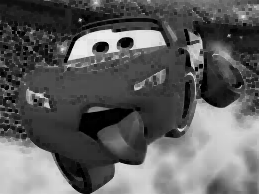

In [82]:
min_filter_built_in = minimum_filter(image, size=3)
cv2_imshow(min_filter_built_in)

Min Filter (Custom)

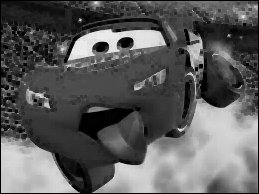

In [83]:
def min_filter_custom(image, kernel_size):
    result = np.zeros_like(image)
    padded_image = np.pad(image, ((kernel_size // 2, ), (kernel_size // 2, )), mode='constant')
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            neighbors = padded_image[i:i+kernel_size, j:j+kernel_size].flatten()
            result[i, j] = np.min(neighbors)
    return result
min_filtered_image_custom = min_filter_custom(image, kernel_size=3)
cv2_imshow(min_filtered_image_custom)

Midpoint Filter (Built In)

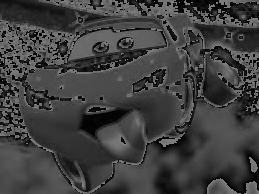

In [84]:
def midpoint_filter(image, kernel_size):
    max_filtered = maximum_filter(image, kernel_size)
    min_filtered = minimum_filter(image, kernel_size)
    result = (max_filtered + min_filtered) / 2
    return result
midpoint_filter_built_in = midpoint_filter(image, kernel_size=3)
cv2_imshow(midpoint_filter_built_in)

Midpoint Filter (Custom)

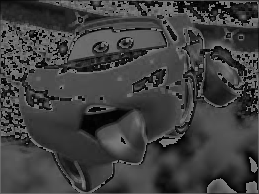

In [85]:
def midpoint_filter(image, kernel_size):
    max_filtered = max_filter_custom(image, kernel_size)
    min_filtered = min_filter_custom(image, kernel_size)
    result = (max_filtered + min_filtered) / 2
    return result
midpoint_filtered_image_custom = midpoint_filter(image, kernel_size=3)
cv2_imshow(midpoint_filtered_image_custom)

Alpha Trimmed Filter (Built In)

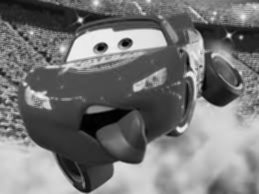

In [86]:
def alpha_trimmed_filter(image, kernel_size, alpha):
    def alpha_trimmed_mean(data):
        sorted_data = np.sort(data)
        trimmed_data = sorted_data[alpha:-alpha]
        return np.mean(trimmed_data)
    result = generic_filter(image, alpha_trimmed_mean, size=kernel_size)
    return result
alpha_trimmed_filter_built_in = alpha_trimmed_filter(image, kernel_size=3, alpha=1)
cv2_imshow(alpha_trimmed_filter_built_in)

Alpha Trimmed Filter (Custom)

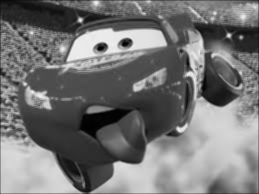

In [87]:
def alpha_trimmed_filter(image, kernel_size, alpha):
    result = np.zeros_like(image)
    padded_image = np.pad(image, ((kernel_size // 2, ), (kernel_size // 2, )), mode='constant')
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            neighbors = padded_image[i:i+kernel_size, j:j+kernel_size].flatten()
            neighbors = np.sort(neighbors)
            trimmed_neighbors = neighbors[alpha:-alpha]
            result[i, j] = np.mean(trimmed_neighbors)
    return result
alpha_trimmed_filtered_image_custom = alpha_trimmed_filter(image, kernel_size=3, alpha=1)
cv2_imshow(alpha_trimmed_filtered_image_custom)

Output Comparison among various non-linear filters

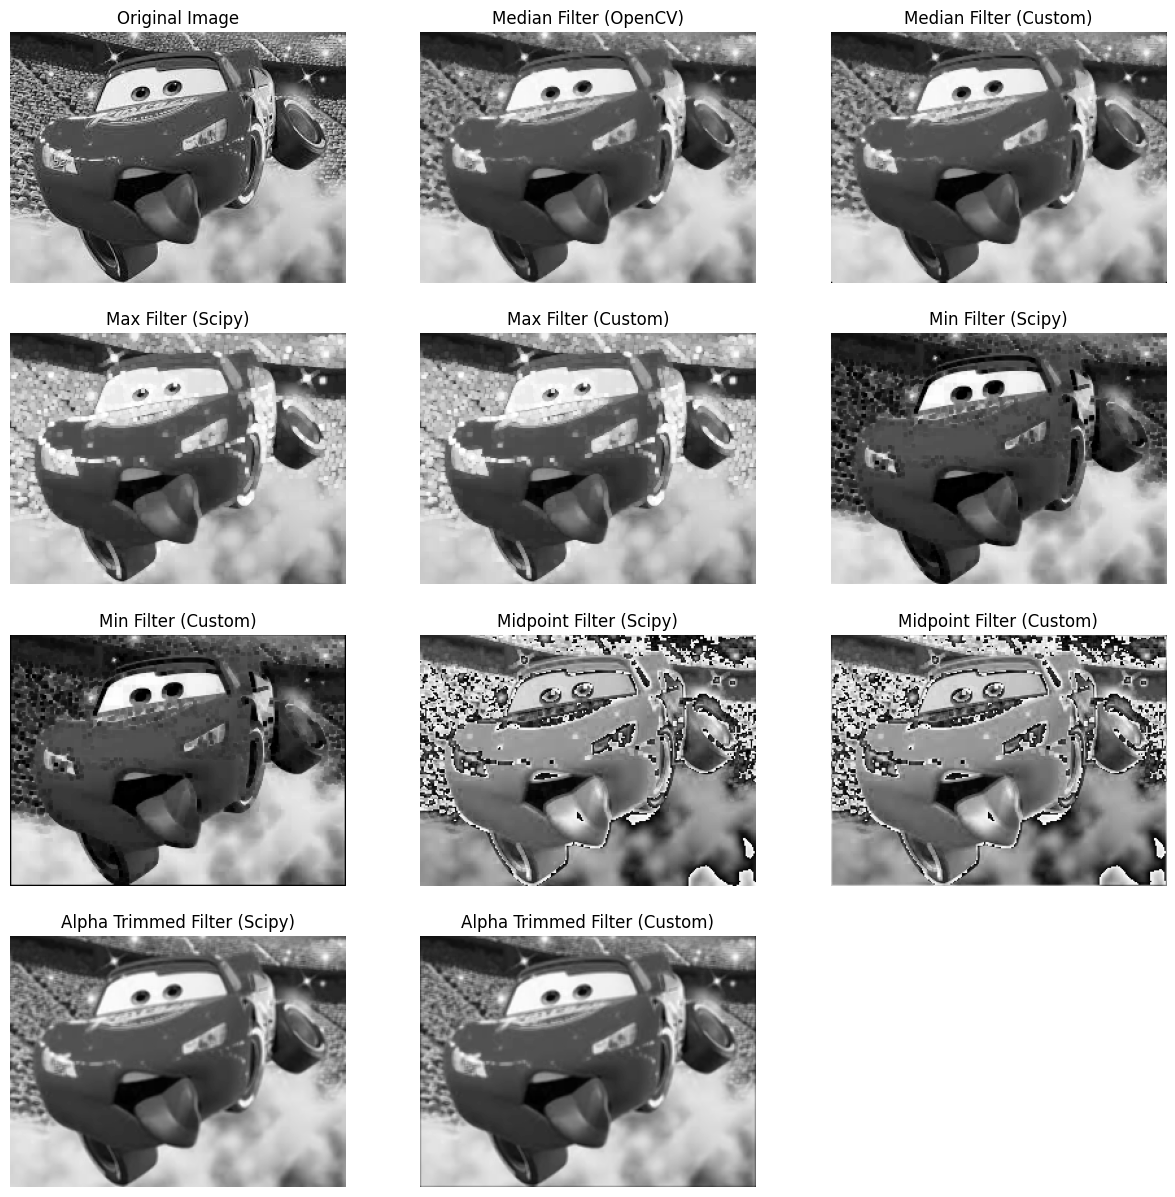

In [88]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 15))
plt.subplot(431), plt.imshow(image, cmap='gray'), plt.title('Original Image'),plt.axis('off')
plt.subplot(432), plt.imshow(median_filter_built_in, cmap='gray'), plt.title('Median Filter (OpenCV)'),plt.axis('off')
plt.subplot(433), plt.imshow(median_filtered_image_custom, cmap='gray'), plt.title('Median Filter (Custom)'),plt.axis('off')
plt.subplot(434), plt.imshow(max_filter_built_in, cmap='gray'), plt.title('Max Filter (Scipy)'),plt.axis('off')
plt.subplot(435), plt.imshow(max_filtered_image_custom, cmap='gray'), plt.title('Max Filter (Custom)'),plt.axis('off')
plt.subplot(436), plt.imshow(min_filter_built_in, cmap='gray'), plt.title('Min Filter (Scipy)'),plt.axis('off')
plt.subplot(437), plt.imshow(min_filtered_image_custom, cmap='gray'), plt.title('Min Filter (Custom)'),plt.axis('off')
plt.subplot(438), plt.imshow(midpoint_filter_built_in, cmap='gray'), plt.title('Midpoint Filter (Scipy)'),plt.axis('off')
plt.subplot(439), plt.imshow(midpoint_filtered_image_custom, cmap='gray'), plt.title('Midpoint Filter (Custom)'),plt.axis('off')
plt.subplot(4,3,10), plt.imshow(alpha_trimmed_filter_built_in, cmap='gray'), plt.title('Alpha Trimmed Filter (Scipy)'),plt.axis('off')
plt.subplot(4,3,11), plt.imshow(alpha_trimmed_filtered_image_custom, cmap='gray'), plt.title('Alpha Trimmed Filter (Custom)'),plt.axis('off')
plt.show()

Introducing various types of noises and removing them by using various filters

Removing Gaussian Noise using Median Filter

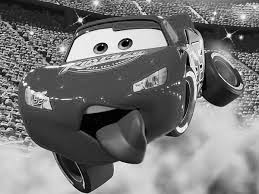

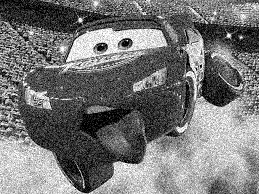

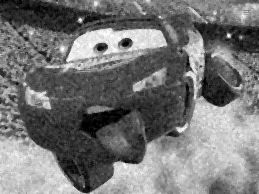

In [89]:
from scipy.ndimage import median_filter
from skimage.util import random_noise

image_gaussian = random_noise(image, mode='gaussian')
image_gaussian = (255 * image_gaussian).astype(np.uint8)
median_filtered_gaussian = median_filter(image_gaussian, size=3)
cv2_imshow(image)
cv2_imshow(image_gaussian)
cv2_imshow(median_filtered_gaussian)

Removing Pepper Noise using Maximum Filter

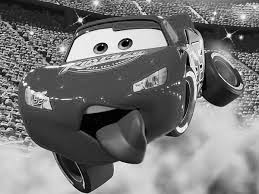

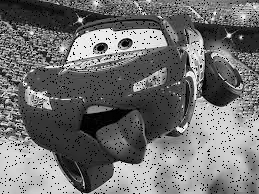

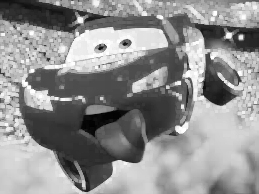

In [94]:
from scipy.ndimage import maximum_filter
from skimage.util import random_noise

image_pepper = random_noise(image, mode='pepper')
image_pepper = (255 * image_pepper).astype(np.uint8)
maximum_filtered_pepper = maximum_filter(image_pepper, size=3)
cv2_imshow(image)
cv2_imshow(image_pepper)
cv2_imshow(maximum_filtered_pepper)
#black pepper pixels replaced with maximum value (255) i.e. white pixel

Removing Salt Noise using Minimum Filter

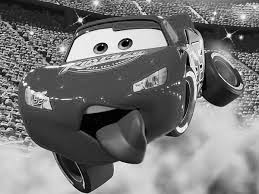

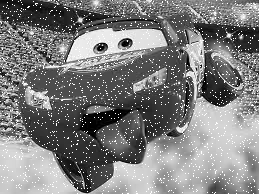

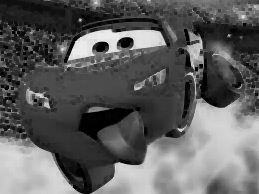

In [95]:
from skimage.util import random_noise

image_salt_salt = random_noise(image, mode='salt')
image_salt_salt = (255 * image_salt_salt).astype(np.uint8)
minimum_filtered_salt = minimum_filter(image_salt_salt, size=3)
cv2_imshow(image)
cv2_imshow(image_salt_salt)
cv2_imshow(minimum_filtered_salt)
#white salt pixels replaced with minimum value (0) i.e. black pixel

Removing Poisson Noise using Midpoint Filter

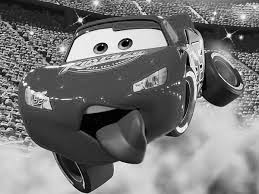

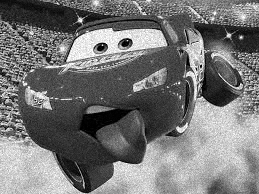

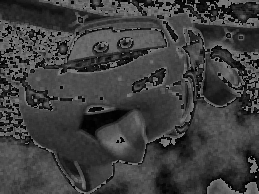

In [100]:
image_poisson= random_noise(image, mode='poisson')
image_poisson= (255 * image_poisson).astype(np.uint8)

def midpoint_filter(image, kernel_size):
    max_filtered = maximum_filter(image, size=kernel_size)
    min_filtered = minimum_filter(image, size=kernel_size)
    result = (max_filtered + min_filtered) / 2
    return result

midpoint_filtered_poisson = midpoint_filter(image_poisson, kernel_size=3)
cv2_imshow(image)
cv2_imshow(image_poisson)
cv2_imshow(midpoint_filtered_poisson)

Removing Speckle Noise using Alpha Trimmed Filter

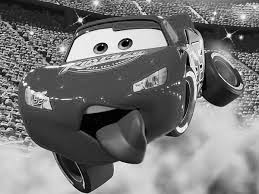

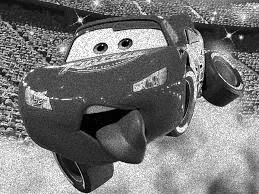

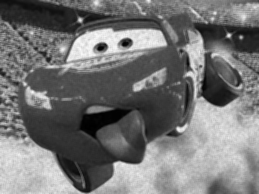

In [101]:
image_speckle= random_noise(image, mode='speckle')
image_speckle= (255 * image_speckle).astype(np.uint8)

def alpha_trimmed_filter(image, kernel_size, alpha):
    def alpha_trimmed_mean(data):
        sorted_data = np.sort(data)
        trimmed_data = sorted_data[alpha:-alpha]
        return np.mean(trimmed_data)
    alpha_trimmed_filtered_speckle = generic_filter(image_speckle, alpha_trimmed_mean, size=kernel_size)
    return alpha_trimmed_filtered_speckle

alpha_trimmed_filtered_speckle = alpha_trimmed_filter(image_speckle, kernel_size=3, alpha=1)
cv2_imshow(image)
cv2_imshow(image_speckle)
cv2_imshow(alpha_trimmed_filtered_speckle)